<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Bagging and Boosting vs. Regression

Week 8 | 1.3

---

This lab uses the housing data from Project 3 to compare bagging and boosting ensemble methods to regression.

### 1. Load packages and data

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

**You may want to load a cleaned/feature engineered version of the data that you have from project 3 rather than the raw housing data file (to skip the data munging and cleaning part.**

My path to the raw file is below; replace this with your own dataset.

In [2]:
house = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-4/datasets/housing_regression/housing.csv')

In [3]:
processed = pd.read_csv('./train_test.csv')

In [4]:
house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
price = house.SalePrice.values
ln_price = np.log(price+1)

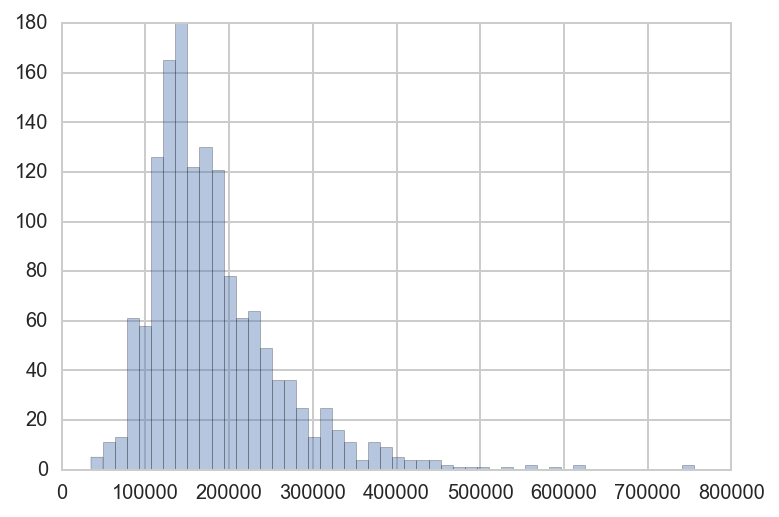

In [8]:
sns.distplot(price, kde=False, bins=50)

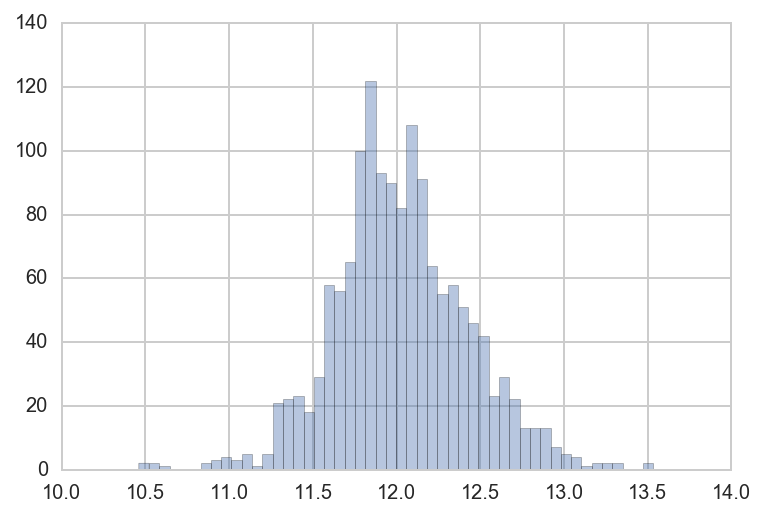

In [9]:
sns.distplot(ln_price, kde=False, bins=50)

In [6]:
print house.shape, processed.shape

(1460, 81) (2919, 146)


In [7]:
processed.columns

Index([u'Intercept', u'BldgType[T.2fmCon]', u'BldgType[T.Duplex]',
       u'BldgType[T.Twnhs]', u'BldgType[T.TwnhsE]', u'CentralAir[T.Y]',
       u'ConditionOne[T.Feedr]', u'ConditionOne[T.Norm]',
       u'ConditionOne[T.PosA]', u'ConditionOne[T.PosN]',
       ...
       u'OverallQual', u'PoolArea', u'ScreenPorch', u'TotRmsAbvGrd',
       u'WoodDeckSF', u'YearBuilt', u'YearRemodAdd', u'YrAgeWhenSold',
       u'YrSold', u'is_test'],
      dtype='object', length=146)

In [10]:
processed.drop('Intercept', axis=1, inplace=True)

In [12]:
train, test = processed[processed.is_test == 0], processed[processed.is_test == 1]

In [14]:
print train.shape, test.shape, house.shape[0] + test.shape[0], processed.shape

(1460, 145) (1459, 145) 2919 (2919, 145)


In [15]:
train.drop('is_test', axis=1, inplace=True)
test.drop('is_test', axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
train.shape, test.shape

((1460, 144), (1459, 144))

In [17]:
for col in train.columns:
    print col

BldgType[T.2fmCon]
BldgType[T.Duplex]
BldgType[T.Twnhs]
BldgType[T.TwnhsE]
CentralAir[T.Y]
ConditionOne[T.Feedr]
ConditionOne[T.Norm]
ConditionOne[T.PosA]
ConditionOne[T.PosN]
ConditionOne[T.RRAe]
ConditionOne[T.RRAn]
ConditionOne[T.RRNe]
ConditionOne[T.RRNn]
ConditionTwo[T.Feedr]
ConditionTwo[T.Norm]
ConditionTwo[T.PosA]
ConditionTwo[T.PosN]
ConditionTwo[T.RRAe]
ConditionTwo[T.RRAn]
ConditionTwo[T.RRNn]
ExterCond[T.Fa]
ExterCond[T.Gd]
ExterCond[T.Po]
ExterCond[T.TA]
ExterQual[T.Fa]
ExterQual[T.Gd]
ExterQual[T.TA]
Foundation[T.CBlock]
Foundation[T.PConc]
Foundation[T.Slab]
Foundation[T.Stone]
Foundation[T.Wood]
Heating[T.GasA]
Heating[T.GasW]
Heating[T.Grav]
Heating[T.OthW]
Heating[T.Wall]
HeatingQC[T.Fa]
HeatingQC[T.Gd]
HeatingQC[T.Po]
HeatingQC[T.TA]
HouseStyle[T.1.5Unf]
HouseStyle[T.1Story]
HouseStyle[T.2.5Fin]
HouseStyle[T.2.5Unf]
HouseStyle[T.2Story]
HouseStyle[T.SFoyer]
HouseStyle[T.SLvl]
LandContour[T.HLS]
LandContour[T.Low]
LandContour[T.Lvl]
LandSlope[T.Mod]
LandSlope[T.Sev]
L

---

### 2. Build a decision tree regressor

1. Train a decision tree regressor on the regression problem (predicting `SalePrice` or a transformed version of it from predictors of your choice.)
- Evaluate the score with a 5-fold cross-validation
- How does this compare to the model you fit on this data for Project 3?


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [19]:
y = ln_price
X = train

In [23]:
dtc = DecisionTreeRegressor()

dtc_params = {
    'max_depth':[2,3,4,5,6,None],
    'min_samples_split':[2, 4, 8, 16, 32, 64, 128],
    'max_features':[None, 'sqrt', 'log2']
}

dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, n_jobs=-1)
dtc_gs.fit(X, y)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 4, 8, 16, 32, 64, 128], 'max_features': [None, 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [24]:
print dtc_gs.best_params_
dtc_best = dtc_gs.best_estimator_

{'max_features': None, 'min_samples_split': 4, 'max_depth': 6}


In [25]:
dtc_scores = cross_val_score(dtc_best, X, y, cv=5)
print dtc_scores
print np.mean(dtc_scores), np.std(dtc_scores)

[ 0.75874709  0.73254613  0.77781086  0.78629296  0.73261639]
0.757602685407 0.0222933062625


---

### 3. Build a random forest regressor

1. Train a random forest regressor on the regression problem.
- Evaluate the score with a 5-fold cross-validation
- How does this compare to the models you fit on this data previously?

You may want to use a gridsearch to find the optimal parameters. Be careful to not put too many different options/parameters into the gridsearch or it will take a long time to fit.

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf = RandomForestRegressor()

rf_params = {
    'n_estimators':[100],
    'max_depth':[2,3,4,5,6,None],
    'min_samples_split':[2, 4, 8, 16, 32, 64, 128],
    'max_features':[None, 'sqrt', 'log2']
}

rf_gs = GridSearchCV(rf, rf_params, cv=5, verbose=1, n_jobs=-1)
rf_gs.fit(X, y)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100], 'min_samples_split': [2, 4, 8, 16, 32, 64, 128], 'max_depth': [2, 3, 4, 5, 6, None], 'max_features': [None, 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [29]:
print rf_gs.best_params_
rf_best = rf_gs.best_estimator_

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'max_depth': None}


In [30]:
rf_scores = cross_val_score(rf_best, X, y, cv=5)
print rf_scores
print np.mean(rf_scores), np.std(rf_scores)

[ 0.87642381  0.85971119  0.84830623  0.87079736  0.84445442]
0.859938601059 0.0123676881648


---

### 4. Build an AdaBoost regressor and/or a gradient boosted regressor

The models both allow you to change the base estimator (they default to decision tree regressors, which I would recommend). The most important parameters in Adaboost besides the `base_estimator` for each model are:

    n_estimators: how many weak learners to chain together
    learning_rate: how much should the contribution of subsequent weak learners be "shrunk" (this means that in addition to the reweighting, subsequent weak learners are also forced to have a smaller impact.)
    
The gradient boosting regressor forces you to use decision trees, but allows you to modify components of each weak learner tree through its keyword arguments, such as `max_depth`, `max_features`, `min_samples_split`, etc. 

1. Build the model(s). You may want to find the best parameters with a gridsearch.
2. Evaluate the score using cross-validation as before.
3. How does boosting compare to bagging (random forest) and the original model you built for your project?

In [32]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [38]:
ada = AdaBoostRegressor()

ada_params = {
    'n_estimators':[1000],
    'learning_rate':[0.01]
}

ada_gs = GridSearchCV(ada, ada_params, cv=5, verbose=1, n_jobs=-1)
ada_gs.fit(X, y)




Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000], 'learning_rate': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [35]:
print ada_gs.best_params_
ada_best = ada_gs.best_estimator_

{'n_estimators': 150, 'learning_rate': 0.5}


In [37]:
print ada_gs.best_score_

0.787639535474


0.779383774934


---

### 5. [Bonus] Submit to kaggle with your bagging and/or boosting model.

Using the test data like we did in class, make predictions and submit your score to kaggle. Does your ensemble model perform better?

I've put the path to my test data below (which should be in the equivalent folder in your repo).

In [6]:
test = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-4/datasets/housing_regression/test_houses.csv')
